<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Merging-Data-from-Jackson-et-al-(2018)" data-toc-modified-id="Merging-Data-from-Jackson-et-al-(2018)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Merging Data from Jackson et al (2018)</a></span><ul class="toc-item"><li><span><a href="#Parsing-Table-2" data-toc-modified-id="Parsing-Table-2-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Parsing Table 2</a></span></li><li><span><a href="#Parsing-Table-4" data-toc-modified-id="Parsing-Table-4-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Parsing Table 4</a></span></li><li><span><a href="#Merging-and-Unit-Correction" data-toc-modified-id="Merging-and-Unit-Correction-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Merging and Unit Correction</a></span></li></ul></li><li><span><a href="#Query-GAIA-DR2-and-2MASS" data-toc-modified-id="Query-GAIA-DR2-and-2MASS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Query GAIA DR2 and 2MASS</a></span></li><li><span><a href="#Isoclassify-$R_*$-Calculations" data-toc-modified-id="Isoclassify-$R_*$-Calculations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Isoclassify $R_*$ Calculations</a></span><ul class="toc-item"><li><span><a href="#Convert-Data-to-Isoclassify-readable-format" data-toc-modified-id="Convert-Data-to-Isoclassify-readable-format-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Convert Data to Isoclassify readable format</a></span></li><li><span><a href="#Executing-Isoclassify" data-toc-modified-id="Executing-Isoclassify-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Executing Isoclassify</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd

In [2]:
main_dir = "/u/kaimibk/Documents/Research/NAC/"
data_dir = main_dir+"data/"
out_dir = main_dir+"output/"

## Merging Data from Jackson et al (2018)

### Parsing Table 2

In [3]:
df_j1 = pd.read_csv(data_dir+"MN_17_3616_MJ_Table2.csv")
# save units row
j1_units = df_j1.loc[0]
# drop units row
df_j1 = df_j1.drop(0)
# Set index to "Name" column
df_j1 = df_j1.set_index("Name")

### Parsing Table 4

In [4]:
df_j2 = pd.read_csv(data_dir+"MN_17_3616_MJ_Table4.csv")
# save units row
j2_units = df_j2.loc[0]
# drop units row
df_j2 = df_j2.drop(0)
# drop repeat columns
df_j2 = df_j2.drop(columns=["PERIOD", "logL/Lo"])
# Set index to "Name" column
df_j2 = df_j2.set_index("Name")

### Merging and Unit Correction

In [5]:
from astropy.coordinates import SkyCoord
import astropy.units as u

In [6]:
df = pd.concat([df_j1, df_j2], axis=1)

In [7]:
temp = SkyCoord(ra=df.RA, dec=df.Dec, unit=(u.hourangle, u.deg))
df.RA, df.Dec = temp.ra.degree, temp.dec.degree
del temp

In [8]:
'''
If the VSINI is an upper limit (containing "<"), we shall use a flat distribution,
other wise we assume a uniform distribution centered at VSINI with std_dev = EVSINI.
So I am adding a column to reflect that for future reference.
'''
df["distribution"] = df.VSINI.apply(lambda x: "flat" if "<" in x else "uniform")

In [9]:
df.to_csv(data_dir+"Pleiades_master.csv")

## Query GAIA DR2 and 2MASS

In [4]:
df = pd.read_csv(data_dir+"Pleiades_master.csv")

In [11]:
from Queries import query_survey

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [12]:
gaia_features = [
        "parallax", "parallax_error",
        "radius_val", "radius_percentile_lower", "radius_percentile_upper",
        "lum_val", "lum_percentile_lower", "lum_percentile_upper",
        "teff_val", "teff_percentile_lower", "teff_percentile_upper",
        "bp_rp", "phot_g_mean_mag"
    ]
TMASS_features = [
        "j_m", "j_msigcom", 
        "h_m", "h_msigcom",
        "k_m", "k_msigcom"
   ]

In [13]:
def query(row):
    if row % 10 == 0:
        print("Inspecting row {}".format(row))
    global gaia_features
    global TMASS_features
    
    query_survey(df, row, features=gaia_features, survey='GAIA')
    query_survey(df, row, features=TMASS_features, survey='2MASS')

In [16]:
N = len(df)
for i in range(N):
    query(i)

Inspecting row 0


Inspecting row 10
Inspecting row 20
Inspecting row 30
Inspecting row 40
Inspecting row 50
Inspecting row 60
Inspecting row 70
Inspecting row 80
Inspecting row 90
Inspecting row 100
Inspecting row 110
Inspecting row 120
Inspecting row 130
Inspecting row 140
Inspecting row 150
Inspecting row 160
Inspecting row 170
Inspecting row 180
Inspecting row 190
Inspecting row 200
Inspecting row 210
Inspecting row 220
Inspecting row 230
Inspecting row 240
Inspecting row 250
Inspecting row 260
Inspecting row 270
Inspecting row 280
Inspecting row 290
Inspecting row 300
Inspecting row 310


In [18]:
df.tail(5)

,Name,RA,Dec,K2MASS,(V-K)o,Period,Ref,BCK,logL/Lo,M/Mo,...,teff_percentile_lower,teff_percentile_upper,bp_rp,phot_g_mean_mag,j_m,j_msigcom,h_m,h_msigcom,k_m,k_msigcom
314,J03511685+2349357,57.820233,23.826606,9.96,2.33,7.947,1,2.00,-0.62,0.80,...,4892.000000,5084.000000,1.245935,12.095963,10.616,0.021,10.077,0.029,9.957,0.021
315,J03512213+2509580,57.842225,25.166136,10.66,3.51,7.569,1,2.49,-1.10,0.62,...,3879.803467,4446.470215,1.820186,13.620668,11.493,0.021,10.828,0.015,10.655,0.021
316,J03512440+2405147,58.348742,24.065061,10.27,3.14,5.469,3,2.37,-0.89,0.69,...,5240.000000,5772.000000,1.009373,11.162713,9.949,0.022,9.564,0.027,9.439,0.021
317,J03512993+2353572,58.348742,24.065061,10.30,3.06,0.884,3,2.34,-0.89,0.70,...,5240.000000,5772.000000,1.009373,11.162713,9.949,0.022,9.564,0.027,9.439,0.021
318,J03514044+2458594,57.918500,24.983186,9.14,1.67,3.370,1,1.59,-0.13,1.01,...,5298.000000,5625.000000,0.916104,10.697075,9.535,0.021,9.219,0.015,9.137,0.022


In [5]:
df["radius_sigma"] = pd.DataFrame([df["radius_percentile_upper"] - df["radius_val"],
                                 df["radius_val"] - df["radius_percentile_lower"]]).mean(axis=0)

df["lum_sigma"] = pd.DataFrame([df["lum_percentile_upper"] - df["lum_val"],
                                 df["lum_val"] - df["lum_percentile_lower"]]).mean(axis=0)

df["teff_sigma"] = pd.DataFrame([df["teff_percentile_upper"] - df["teff_val"],
                                 df["teff_val"] - df["teff_percentile_lower"]]).mean(axis=0)

In [6]:
df.to_csv(data_dir+"Pleiades_master.csv")

## Isoclassify $R_*$ Calculations

### Convert Data to Isoclassify readable format

In [30]:
df = pd.read_csv(data_dir+"Pleiades_master.csv")
df["band"] = "kmag"
df["parallax"] = df["parallax"] * 10 ** (-3)
df["parallax_error"] = df["parallax_error"] * 10 ** (-3)
df["Index"] = df.index
df_iso = df[["Index", "RA", "Dec", 
              "parallax", 
              "parallax_error",
              "j_m", "j_msigcom",
              "h_m", "h_msigcom",
              "k_m", "k_msigcom", "band", "Name"
             ]]
df_iso.columns = ["id_starname", "ra","dec",
                  "parallax","parallax_err",
                  "jmag","jmag_err","hmag",
                  "hmag_err","kmag","kmag_err",
                  "band","comments"]
df = df.drop(columns="Index")
df_iso.to_csv(main_dir+"Pleiades_iso.csv")
df.index = df.Name

### Executing Isoclassify

In [31]:
import sys
from os.path import isdir, isfile
sys.path.append("/u/kaimibk/Documents/scripts/isoclassify/")
from isoclassify import *

In [42]:
df = pd.read_csv(data_dir+"Pleiades_master.csv")
df.head(2)

,Name,RA,Dec,K2MASS,(V-K)o,Period,Ref,BCK,logL/Lo,M/Mo,...,k_msigcom,iso_rad,iso_rad_Err,radius_sigma,lum_sigma,teff_sigma,iso_teff,iso_teff_Err,V_iso,V_iso_err
0,J03394633+2358531,54.943067,23.981442,11.83,4.89,1.138,1,2.73,-1.66,0.41,...,0.022,0.328400,0.016717,NaN,NaN,358.07666,4222.314638,100.0,14.599889,0.743210
1,J03414664+2301198,55.444367,23.022186,13.16,5.63,0.294,1,2.81,-2.23,0.19,...,0.028,0.268599,0.009612,NaN,NaN,NaN,3951.132399,100.0,46.221674,1.654106


id_starname 0
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 12.643 0.026
hmag 12.004 0.03
kmag 11.83 0.022
parallax 7.387778052935219e-09 8.065719415380315e-11
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 54.94306666666666
dec 23.981441666666665


/u/kaimibk/Documents/scripts/isoclassify/direct/classify_direct.py:86: RuntimeWarning: invalid value encountered in divide
  dis2=dis/np.sum(dis)
/u/kaimibk/Documents/scripts/isoclassify/direct/classify_direct.py:92: RuntimeWarning: invalid value encountered in less
  um=np.where((ds > tempdis) & (norm < 0.001))[0]
/u/kaimibk/Documents/scripts/isoclassify/direct/classify_direct.py:95: RuntimeWarning: invalid value encountered in less
  umin=np.where((ds < tempdis) & (norm < 0.001))[0]
/u/kaimibk/Documents/scripts/isoclassify/direct/classify_direct.py:120: RuntimeWarning: invalid value encountered in divide
  dis2=dis/np.sum(dis)
/u/kaimibk/Documents/scripts/isoclassify/direct/classify_direct.py:124: RuntimeWarning: invalid value encountered in less
  dsamp=np.random.choice(ds,p=dis2,size=nsample)


using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.824339848599703
   
teff(K): 4212.809663930178 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 9.975903027750574e-05 + 0.0 - 0.0
rad(rsun): 0.002449567793237433 + 0.00012244606206433806 - 0.00011392514331727902
lum(lsun): 1.6980923862208465e-06 + 3.454367723307995e-08 - 3.385399747226798e-08
mabs( kmag ): 16.82994103700166 + 0.021864447822018462 - 0.02186508731782766
-----
created /u/kaimibk/Documents/Research/NAC/output/J03394633+2358531/output.csv
id_starname 1
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 14.081 0.024
hmag 13.485 0.031
kmag 13.162 0.028
parallax 7.000964372856323e-09 1.3840873678714454e-10
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 55.44436666666667
dec 23.02218611111111
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.737478276457942
   
teff(K

created /u/kaimibk/Documents/Research/NAC/output/J03422730+2234248/output.csv
id_starname 10
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 11.797 0.02
hmag 11.085 0.023
kmag 10.92 0.019
parallax 7.242485941533764e-09 4.241283194465851e-11
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 55.622575
dec 22.79060833333333
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.858491906025055
   
teff(K): 4047.064850424523 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.00025215477549860396 + 0.0 - 0.0
rad(rsun): 0.6056617405136713 + 0.01842980838323538 - 0.018410222968364365
lum(lsun): 0.08830975253152373 + 0.010721202313585684 - 0.009696084733434016
mabs( kmag ): 15.919929978873189 + 0.01888293220992665 - 0.018883484501758474
-----
created /u/kaimibk/Documents/Research/NAC/output/J03422941+2247261/output.csv
id_starname 11
dust: allsky
absmag constraint: kmag
teff -99 0
logg 

using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.752009306255037
   
teff(K): 4074.8062589760752 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.0002531573261514414 + 0.0 - 0.0
rad(rsun): 1.0535779018680849 + 0.03216231251313362 - 0.03213376898723164
lum(lsun): 0.27463632587427295 + 0.033186704425598734 - 0.030068675870485784
mabs( kmag ): 17.978914754496337 + 0.0258398019714825 - 0.025840557739247316
-----
created /u/kaimibk/Documents/Research/NAC/output/J03425655+2413457/output.csv
id_starname 21
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 14.25 0.032
hmag 13.59 0.03
kmag 13.255999999999998 0.035
parallax 7.320090409644354e-09 1.5137312604807168e-10
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 55.7552
dec 24.24791388888889
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.729696007515521
   
teff(K): 3769.9094

created /u/kaimibk/Documents/Research/NAC/output/J03432662+2459395/output.csv
id_starname 30
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 14.157 0.025
hmag 13.563 0.029
kmag 13.251 0.032
parallax 8.023039923395058e-09 1.7046923873765438e-10
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 55.86430416666666
dec 22.628161111111112
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.730114751248858
   
teff(K): 3975.360840851314 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.00022207661246631102 + 0.0 - 0.0
rad(rsun): 1.1233811681446277 + 0.034648682497298244 - 0.03459941851757975
lum(lsun): 0.28286990844008664 + 0.0349030046624641 - 0.03157619730140088
mabs( kmag ): 18.25090537979468 + 0.031802833195666125 - 0.03180376337138213
-----
created /u/kaimibk/Documents/Research/NAC/output/J03432743+2237413/output.csv
id_starname 31
dust: allsky
absmag constraint: kmag
teff -99

using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.868245289831343
   
teff(K): 5461.041145216018 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.00018648424151277416 + 0.0 - 0.0
rad(rsun): 0.006565683268661219 + 0.0002536068616504298 - 0.0002409317649694799
lum(lsun): 3.443881653710189e-05 + 7.005763481422701e-07 - 6.865890321726197e-07
mabs( kmag ): 14.26893105909699 + 0.02186444782202024 - 0.021865087317824106
-----
created /u/kaimibk/Documents/Research/NAC/output/J03434841+2511241/output.csv
id_starname 40
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 11.43 0.019
hmag 10.722 0.019
kmag 10.586 0.02
parallax 7.266316562686564e-09 2.8852413472688373e-11
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 55.95249999999999
dec 23.53940277777778
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.8658960850143895
   
teff(K):

no input logg provided, guessing (using Mk): 5.8624369179670515
   
teff(K): 5396.426119410231 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.0003774802055079063 + 0.0 - 0.0
rad(rsun): 0.0076459444713850725 + 0.00029745147252435624 - 0.00028208660293123095
lum(lsun): 4.453217859075975e-05 + 8.227912955253335e-07 - 8.078415031762172e-07
mabs( kmag ): 13.952913401505016 + 0.019876770747291772 - 0.019877352107114277
-----
created /u/kaimibk/Documents/Research/NAC/output/J03440353+2430151/output.csv
id_starname 50
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 9.943 0.027000000000000003
hmag 9.494 0.035
kmag 9.386 0.02
parallax 7.34694822960917e-09 4.4390416638626255e-11
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.02016666666666
dec 24.2755
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.8697700434899325
   
teff(K): 5001.016129155132 +/- 100.0
dis(pc): 1.0 + 0.

created /u/kaimibk/Documents/Research/NAC/output/J03441644+2337043/output.csv
id_starname 59
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 12.595999999999998 0.023
hmag 11.925999999999998 0.031
kmag 11.659 0.023
parallax 7.321262721932614e-09 6.706019386709082e-11
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.07395416666667
dec 24.446375
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.832317803197025
   
teff(K): 3900.9158257731847 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.00010076159275566837 + 0.0 - 0.0
rad(rsun): 0.7500273079983972 + 0.022955913201156752 - 0.022890200317865705
lum(lsun): 0.11690246215501723 + 0.014619396766814952 - 0.013189402657769814
mabs( kmag ): 16.658938763221826 + 0.022858286359387137 - 0.02285895492317991
-----
created /u/kaimibk/Documents/Research/NAC/output/J03441774+2426469/output.csv
id_starname 60
dust: allsky
absmag const

created /u/kaimibk/Documents/Research/NAC/output/J03442627+2435229/output.csv
id_starname 69
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 12.374 0.023
hmag 11.687 0.028
kmag 11.482 0.021
parallax 7.241883322870508e-09 6.2960762568718e-11
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.11198333333333
dec 24.408838888888887
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.839814849850654
   
teff(K): 4009.660165319651 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.00010076159275566837 + 0.0 - 0.0
rad(rsun): 0.7137821640932454 + 0.02174320583976841 - 0.021724573277232317
lum(lsun): 0.11817605234757926 + 0.014470269103339636 - 0.013062241695233318
mabs( kmag ): 16.48194308008795 + 0.020870609284656894 - 0.020871219712468303
-----
created /u/kaimibk/Documents/Research/NAC/output/J03442687+2424318/output.csv
id_starname 70
dust: allsky
absmag constraint: kmag
teff -9

no input logg provided, guessing (using Mk): 5.841049013764081
   
teff(K): 4095.20122274351 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.0003123109741752406 + 0.0 - 0.0
rad(rsun): 0.7075505946279159 + 0.02144063900601012 - 0.021426233535796757
lum(lsun): 0.12635294174358064 + 0.015196769050665748 - 0.013732691056251745
mabs( kmag ): 16.450925216218288 + 0.01788909367256153 - 0.017889616896400895
-----
created /u/kaimibk/Documents/Research/NAC/output/J03443741+2508160/output.csv
id_starname 79
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 11.903 0.022
hmag 11.235 0.024
kmag 11.036 0.02
parallax 7.0730619120316685e-09 5.851587070688587e-11
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.15741249999999
dec 22.921038888888887
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.855275512026793
   
teff(K): 4072.2296878558273 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag)

created /u/kaimibk/Documents/Research/NAC/output/J03445017+2454400/output.csv
id_starname 88
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 9.312 0.05
hmag 8.935 0.057
kmag 8.816 0.021
parallax 7.186253009391361e-09 3.860556692616811e-11
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.22430416666666
dec 23.92126666666667
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.859152377459877
   
teff(K): 5224.741133238936 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.0004180856520768996 + -5.421010862427522e-20 - 0.0
rad(rsun): 0.008301576284469939 + 0.0003340681445588422 - 0.0003163229116581144
lum(lsun): 4.612776165606736e-05 + 8.952963661547591e-07 - 8.782249142895657e-07
mabs( kmag ): 13.815906571336146 + 0.02087060928465867 - 0.02087121971247008
-----
created /u/kaimibk/Documents/Research/NAC/output/J03445383+2355165/output.csv
id_starname 89
dust: allsky
absmag c

no input logg provided, guessing (using Mk): 5.865878506088475
   
teff(K): 4044.5841688221167 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.0003123109741752406 + 0.0 - 0.0
rad(rsun): 0.5465920056026143 + 0.01675972727940922 - 0.016723349720960234
lum(lsun): 0.07175208581115047 + 0.008725583948772889 - 0.007902480271436599
mabs( kmag ): 15.586918740919097 + 0.02087060928465867 - 0.02087121971247008
-----
created /u/kaimibk/Documents/Research/NAC/output/J03451198+2435103/output.csv
id_starname 98
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 14.032 0.029
hmag 13.405 0.035
kmag 13.195 0.034
parallax 7.898458185879747e-09 1.544165517672497e-10
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.30473333333333
dec 24.256622222222234
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.734771969844621
   
teff(K): 4149.403079797198 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag)

created /u/kaimibk/Documents/Research/NAC/output/J03452219+2328182/output.csv
id_starname 107
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 11.922 0.026
hmag 11.201 0.03
kmag 11.042 0.022
parallax 7.2087443157015935e-09 8.143690922225425e-11
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.34789166666666
dec 24.85080833333333
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.855100674579974
   
teff(K): 4039.565940598221 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.00028423805796194885 + 0.0 - 0.0
rad(rsun): 0.6282189406011566 + 0.019250041952774244 - 0.019207768763071065
lum(lsun): 0.09431154784309778 + 0.011478341258958066 - 0.010393532997250293
mabs( kmag ): 16.041919812329787 + 0.021864447822022015 - 0.021865087317824106
-----
created /u/kaimibk/Documents/Research/NAC/output/J03452349+2451029/output.csv
id_starname 108
dust: allsky
absmag constraint: kmag
te

no input logg provided, guessing (using Mk): 5.867388443034207
   
teff(K): 4247.839153899049 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.0001097850482956672 + 1.3552527156068805e-20 - 0.0
rad(rsun): 0.004470741720763475 + 0.00022006434434930066 - 0.00020542410832714332
lum(lsun): 5.846170930851958e-06 + 1.0256790762409666e-07 - 1.0079651346710342e-07
mabs( kmag ): 15.497946358787921 + 0.01888293220992665 - 0.018883484501756698
-----
created /u/kaimibk/Documents/Research/NAC/output/J03454168+2541125/output.csv
id_starname 117
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 9.274 0.02
hmag 8.994 0.015
kmag 8.923 0.015
parallax 7.1804702892911765e-09 4.851671295435177e-11
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.59447916666666
dec 24.570177777777786
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.861758001054408
   
teff(K): 5827.542255134124 +/- 100.0
di

created /u/kaimibk/Documents/Research/NAC/output/J03455498+2413262/output.csv
id_starname 126
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 13.437 0.023
hmag 12.852 0.024
kmag 12.579 0.023
parallax 7.37474182960105e-09 1.2432805137404794e-10
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.48731666666666
dec 23.024780555555555
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.780889652982399
   
teff(K): 4095.2163071519153 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.0003463994893522926 + 0.0 - 0.0
rad(rsun): 0.9554078020696715 + 0.02907232001580906 - 0.029041069577355194
lum(lsun): 0.23039329546839687 + 0.027731714223136195 - 0.025083499608999915
mabs( kmag ): 17.57891050210283 + 0.022858286359383584 - 0.02285895492317991
-----
created /u/kaimibk/Documents/Research/NAC/output/J03455695+2301292/output.csv
id_starname 127
dust: allsky
absmag constraint: kmag
teff

using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.8716690950371095
   
teff(K): 4594.781627368225 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.00012783190873485306 + 0.0 - 0.0
rad(rsun): 0.00494738056918456 + 0.00022534815388252933 - 0.0002110740866675875
lum(lsun): 9.800817716167437e-06 + 1.719500469696025e-07 - 1.6898039188400266e-07
mabs( kmag ): 15.112944282461438 + 0.01888293220992665 - 0.01888348450176025
-----
created /u/kaimibk/Documents/Research/NAC/output/J03460649+2434027/output.csv
id_starname 136
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 11.754 0.026
hmag 11.074000000000002 0.032
kmag 10.890999999999998 0.021
parallax 7.402728292183477e-09 3.5822298822322523e-11
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.53126666666666
dec 24.37439722222221
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.

created /u/kaimibk/Documents/Research/NAC/output/J03461793+2441095/output.csv
id_starname 145
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 14.112 0.025
hmag 13.463 0.035
kmag 13.146 0.03
parallax 7.841654502176439e-09 3.0015178959513775e-10
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.58084999999999
dec 23.01553333333333
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.738783203058155
   
teff(K): 3833.383421326965 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.0002295961832222111 + 0.0 - 0.0
rad(rsun): 1.0961298645700384 + 0.0337413353333631 - 0.03367604740520491
lum(lsun): 0.23283904174678544 + 0.029554991291572907 - 0.02663999213796947
mabs( kmag ): 18.14590883151953 + 0.029815156120935882 - 0.029816028160670527
-----
created /u/kaimibk/Documents/Research/NAC/output/J03461940+2300559/output.csv
id_starname 146
dust: allsky
absmag constraint: kmag
teff -99

created /u/kaimibk/Documents/Research/NAC/output/J03462768+2348457/output.csv
id_starname 155
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 11.491 0.02
hmag 10.806 0.017
kmag 10.659 0.02
parallax 7.278199056506765e-09 3.174235639892648e-11
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.61925833333333
dec 24.75899444444445
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.864513112589503
   
teff(K): 4162.482129597466 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.00016192043695025305 + 0.0 - 0.0
rad(rsun): 0.004257047435701047 + 0.00021439994307443071 - 0.00019944066506548917
lum(lsun): 4.8876343553986194e-06 + 9.030555276195487e-08 - 8.866473659252377e-08
mabs( kmag ): 15.658938202076731 + 0.019876770747291772 - 0.019877352107114277
-----
created /u/kaimibk/Documents/Research/NAC/output/J03462862+2445323/output.csv
id_starname 156
dust: allsky
absmag constraint

no input logg provided, guessing (using Mk): 5.73567972202814
   
teff(K): 3927.1948738655483 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.0004396416362843276 + 0.0 - 0.0
rad(rsun): 1.1059503038030116 + 0.034120109360424866 - 0.03408669755480109
lum(lsun): 0.26111320169162183 + 0.032538374278468896 - 0.029413495260533135
mabs( kmag ): 18.18388034851444 + 0.031802833195666125 - 0.03180376337138213
-----
created /u/kaimibk/Documents/Research/NAC/output/J03464039+2250398/output.csv
id_starname 165
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 14.069 0.026
hmag 13.390999999999998 0.027000000000000003
kmag 13.11 0.033
parallax 7.3092240918183224e-09 1.7847633073572838e-10
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.67991249999999
dec 23.622841666666666
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.741692872940673
   
teff(K): 3849.509760012065 +/- 100.0
dis(

created /u/kaimibk/Documents/Research/NAC/output/J03465326+2252513/output.csv
id_starname 174
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 12.047 0.027000000000000003
hmag 11.4 0.03
kmag 11.205 0.019
parallax 7.320247168310797e-09 7.81315671962414e-11
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.72335416666666
dec 24.28753055555556
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.849995370574044
   
teff(K): 4136.397138025704 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.00022508446720079648 + -2.710505431213761e-20 - 0.0
rad(rsun): 0.0033386294258527975 + 0.00016867520531314894 - 0.00015736228342491708
lum(lsun): 2.9312441821359576e-06 + 5.14270940848425e-08 - 5.053892490909033e-08
mabs( kmag ): 16.204933093364943 + 0.01888293220992665 - 0.01888348450176025
-----
created /u/kaimibk/Documents/Research/NAC/output/J03465360+2417151/output.csv
id_starname 175


no input logg provided, guessing (using Mk): 5.798148978799085
   
teff(K): 4054.600242070119 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.0002521547524766838 + 0.0 - 0.0
rad(rsun): 0.8922062560833007 + 0.02703185565825139 - 0.027036763699457622
lum(lsun): 0.19305309805746299 + 0.023403332702476104 - 0.021127642553963405
mabs( kmag ): 17.308927820442772 + 0.01987677074728822 - 0.019877352107116053
-----
created /u/kaimibk/Documents/Research/NAC/output/J03465947+2452464/output.csv
id_starname 184
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 13.169 0.029
hmag 12.568 0.03
kmag 12.272 0.024
parallax 7.165227970020259e-09 2.490586935623181e-10
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.7512125
dec 24.47356944444445
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.800373269224549
   
teff(K): 3997.3213199457036 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 6.316

created /u/kaimibk/Documents/Research/NAC/output/J03471102+2413517/output.csv
id_starname 193
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 10.624 0.021
hmag 10.148 0.024
kmag 10.009 0.018000000000000002
parallax 7.349683243233598e-09 4.389217940050045e-11
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.80637499999999
dec 23.714311111111112
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.872197497750549
   
teff(K): 4802.426509458399 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.0001854816122710532 + 0.0 - 0.0
rad(rsun): 0.005040320696070456 + 0.00021935298902543005 - 0.0002059575210860056
lum(lsun): 1.2139575248174572e-05 + 2.016800999803204e-07 - 1.9837850058703705e-07
mabs( kmag ): 15.00893980818369 + 0.017889093672563305 - 0.017889616896400895
-----
created /u/kaimibk/Documents/Research/NAC/output/J03471352+2342515/output.csv
id_starname 194
dust: allsky
a

created /u/kaimibk/Documents/Research/NAC/output/J03472201+2321366/output.csv
id_starname 203
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 14.174 0.028
hmag 13.472 0.03
kmag 13.208 0.034
parallax 7.528489038400852e-09 2.3017288877775185e-10
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.84322083333333
dec 24.238577777777767
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.73369765400635
   
teff(K): 3833.362683858869 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.00017746080500422102 + 0.0 - 0.0
rad(rsun): 1.1121907162960807 + 0.034394700441748194 - 0.034401419803586464
lum(lsun): 0.23971468739020696 + 0.03046126928298787 - 0.027508618627725412
mabs( kmag ): 18.207906196064204 + 0.03379051027039637 - 0.03379149858209374
-----
created /u/kaimibk/Documents/Research/NAC/output/J03472237+2414188/output.csv
id_starname 204
dust: allsky
absmag constraint: kmag
teff 

no input logg provided, guessing (using Mk): 5.75997125533701
   
teff(K): 4044.481333328987 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 7.519518857296265e-05 + 0.0 - 0.0
rad(rsun): 1.0272904709534094 + 0.03141175139359009 - 0.03133494662301661
lum(lsun): 0.2534051610969627 + 0.030812893970814492 - 0.027889790481739285
mabs( kmag ): 17.873935229387293 + 0.02583980197147895 - 0.025840557739247316
-----
created /u/kaimibk/Documents/Research/NAC/output/J03473199+2410249/output.csv
id_starname 213
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 13.958 0.038
hmag 13.334 0.042
kmag 13.047 0.036000000000000004
parallax 7.470183334020275e-09 1.4267960326878968e-10
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.88389999999999
dec 24.40516388888889
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.746708163849611
   
teff(K): 3963.2070973290906 +/- 100.0
dis(pc): 1.0 + 0.0

no input logg provided, guessing (using Mk): 5.730868784921948
   
teff(K): 4165.117023141618 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.00018147122928432397 + 0.0 - 0.0
rad(rsun): 0.0013012136998979383 + 6.78586962608147e-05 - 6.336559389620946e-05
lum(lsun): 4.5779397984925213e-07 + 1.5337419311206666e-08 - 1.483980189656681e-08
mabs( kmag ): 18.241901417790945 + 0.03577818734512661 - 0.03577923379280534
-----
created /u/kaimibk/Documents/Research/NAC/output/J03473977+2300047/output.csv
id_starname 223
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 10.057 0.02
hmag 9.511 0.022
kmag 9.356 0.018000000000000002
parallax 5.779793155571493e-09 3.7823121859432174e-10
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.92073333333333
dec 22.930013888888887
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.86941100764602
   
teff(K): 4531.0318091405325 +/- 100.0
dis(pc)

no input logg provided, guessing (using Mk): 5.808318551306949
   
teff(K): 4113.111195797838 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.00020402977903210152 + 0.0 - 0.0
rad(rsun): 0.0021941781130668447 + 0.00011244058360388711 - 0.00010456401001001378
lum(lsun): 1.2379755762412288e-06 + 2.6340495481395828e-08 - 2.579097670253073e-08
mabs( kmag ): 17.13492688201562 + 0.022858286359387137 - 0.02285895492317991
-----
created /u/kaimibk/Documents/Research/NAC/output/J03475526+2319060/output.csv
id_starname 233
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 14.231 0.029
hmag 13.628 0.035
kmag 13.343 0.038
parallax 7.555396203454178e-09 2.023805451940908e-10
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 56.98594999999999
dec 24.258902777777767
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.72229638397431
   
teff(K): 4019.6044214570957 +/- 100.0
dis(pc): 1.0 + 0.

created /u/kaimibk/Documents/Research/NAC/output/J03480796+2344238/output.csv
id_starname 242
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 13.599 0.021
hmag 13.05 0.026
kmag 12.828 0.028
parallax 7.449435939204903e-09 1.2643702204891618e-10
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 57.03728749999999
dec 23.706552777777766
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.763375632957638
   
teff(K): 4327.7363016317195 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.00019851543314763966 + -2.710505431213761e-20 - 0.0
rad(rsun): 0.0015025117663611189 + 7.379580982439047e-05 - 6.91376187757658e-05
lum(lsun): 7.113864699415008e-07 + 1.846908558416442e-08 - 1.8001203291076095e-08
mabs( kmag ): 17.827916724286553 + 0.027827479046212744 - 0.02782829294995537
-----
created /u/kaimibk/Documents/Research/NAC/output/J03480894+2342235/output.csv
id_starname 243
dust: alls

created /u/kaimibk/Documents/Research/NAC/output/J03481801+2353294/output.csv
id_starname 252
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 12.344 0.02
hmag 11.717 0.022
kmag 11.508 0.018000000000000002
parallax 7.293600691701366e-09 6.370223928472017e-11
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 57.08262916666666
dec 23.603372222222234
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.838762230992277
   
teff(K): 4152.021415091263 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.00019851543314763966 + -2.710505431213761e-20 - 0.0
rad(rsun): 0.002891384798238893 + 0.0001452385545241742 - 0.00013555322289343988
lum(lsun): 2.231933809118532e-06 + 3.70800974968358e-08 - 3.647307862184707e-08
mabs( kmag ): 16.50793830861718 + 0.017889093672565082 - 0.017889616896400895
-----
created /u/kaimibk/Documents/Research/NAC/output/J03481983+2336121/output.csv
id_starname 25

using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.761829149476904
   
teff(K): 4004.770322619074 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.00021004540316648903 + 0.0 - 0.0
rad(rsun): 1.0210663290357447 + 0.03150145491765888 - 0.031468775874657795
lum(lsun): 0.2406913870860797 + 0.02951392322299698 - 0.026759555881086694
mabs( kmag ): 17.848908922441836 + 0.030808994658301003 - 0.03080989576602633
-----
created /u/kaimibk/Documents/Research/NAC/output/J03483183+2401590/output.csv
id_starname 262
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 14.8 0.032
hmag 14.099 0.048
kmag 13.747 0.046
parallax 6.938664109943079e-09 3.7016700056672036e-10
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 57.14660833333332
dec 22.89515
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.6854862582423955
   
teff(K): 3641.496002617567

created /u/kaimibk/Documents/Research/NAC/output/J03484894+2416027/output.csv
id_starname 271
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 11.94 0.024
hmag 11.35 0.031
kmag 11.05 0.019
parallax 7.213317836079104e-09 6.35657689140219e-11
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 57.23894166666666
dec 24.32883888888889
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.854864792884963
   
teff(K): 4014.6275369734026 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 0.00014988920832683907 + 0.0 - 0.0
rad(rsun): 0.6297344406252268 + 0.01914157483152379 - 0.01913151989541395
lum(lsun): 0.0924412498487317 + 0.011295558888289203 - 0.010200025341887575
mabs( kmag ): 16.049941744726112 + 0.018882932209923098 - 0.01888348450176025
-----
created /u/kaimibk/Documents/Research/NAC/output/J03485734+2419438/output.csv
id_starname 272
dust: allsky
absmag constraint: kmag
teff -99 

no input logg provided, guessing (using Mk): 5.865530134842581
   
teff(K): 4159.826042250639 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 8.973298416890493e-05 + 0.0 - 0.0
rad(rsun): 0.00436569441192685 + 0.00021891573769869128 - 0.0002042864090236558
lum(lsun): 5.126741276016745e-06 + 8.517280646009673e-08 - 8.377848700980477e-08
mabs( kmag ): 15.605950824250066 + 0.017889093672563305 - 0.01788961689640267
-----
created /u/kaimibk/Documents/Research/NAC/output/J03491127+2333189/output.csv
id_starname 281
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 11.505 0.02
hmag 10.804 0.022
kmag 10.664 0.017
parallax 7.379370635075763e-09 3.326630961729854e-11
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 57.30125416666666
dec 23.22837222222222
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.864413490252159
   
teff(K): 4138.97896501813 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0


no input logg provided, guessing (using Mk): 5.791838889630548
   
teff(K): 4125.948309457611 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 5.213534874993433e-05 + 0.0 - 0.0
rad(rsun): 0.001925950832336707 + 9.83628973312816e-05 - 9.152518657536135e-05
lum(lsun): 9.657547433418968e-07 + 2.0548433217372678e-08 - 2.0119749180768782e-08
mabs( kmag ): 17.41094435776602 + 0.022858286359387137 - 0.02285895492317991
-----
created /u/kaimibk/Documents/Research/NAC/output/J03493253+2355426/output.csv
id_starname 291
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 12.604 0.022
hmag 11.987 0.022
kmag 11.745 0.02
parallax 7.367681922365623e-09 7.651431996070759e-11
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 57.38761666666666
dec 24.53410555555556
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.8283965771722155
   
teff(K): 4092.640346964001 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.

created /u/kaimibk/Documents/Research/NAC/output/J03495833+2342340/output.csv
id_starname 300
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 12.854 0.024
hmag 12.228 0.023
kmag 11.996 0.018000000000000002
parallax 7.622099972815706e-09 9.065158373727987e-11
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 57.50903749999999
dec 23.862480555555557
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.81590382644087
   
teff(K): 4095.0892016285334 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 5.915359706492564e-05 + 0.0 - 0.0
rad(rsun): 0.8219998500239519 + 0.024857122242090246 - 0.024861824280574152
lum(lsun): 0.1705062155259431 + 0.020505823826540204 - 0.0185245523136163
mabs( kmag ): 16.99595434246818 + 0.01788909367256153 - 0.017889616896400895
-----
created /u/kaimibk/Documents/Research/NAC/output/J03500216+2351449/output.csv
id_starname 301
dust: allsky
absmag constrain

created /u/kaimibk/Documents/Research/NAC/output/J03504007+2355590/output.csv
id_starname 310
dust: allsky
absmag constraint: kmag
teff -99 0
logg -99 0
feh -99 0
gmag -99 0
rmag -99 0
imag -99 0
zmag -99 0
jmag 9.677 0.026
hmag 9.23 0.027000000000000003
kmag 9.054 0.018000000000000002
parallax 6.876626689616241e-09 6.556887306060005e-10
bmag -99 0
vmag -99 0
btmag -99 0
vtmag -99 0
ra 57.7263375
dec 23.83489722222221
using max distance: 100000.0
using min distance: 1.0
no input logg provided, guessing (using Mk): 5.86456219349974
   
teff(K): 4775.99747917688 +/- 100.0
dis(pc): 1.0 + 0.0 - 0.0
av(mag): 8.070957605405396e-05 + 0.0 - 0.0
rad(rsun): 0.007851805446272238 + 0.0003435892593315025 - 0.00032248694809791124
lum(lsun): 2.881663262344451e-05 + 4.787433851498591e-07 - 4.709061276807628e-07
mabs( kmag ): 14.053951862410763 + 0.017889093672563305 - 0.017889616896400895
-----
created /u/kaimibk/Documents/Research/NAC/output/J03505432+2350056/output.csv
id_starname 311
dust: allsky
a

/u/kaimibk/miniconda3/envs/py27/lib/python2.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


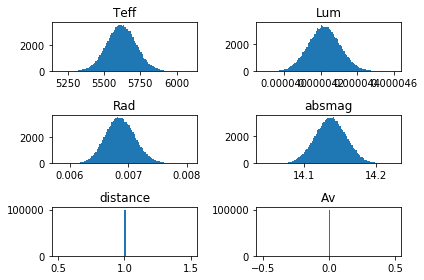

In [43]:
k = 0
for idx, row in df.iterrows():
    out_dir = main_dir+"output/{}/".format(row.Name)
    
    if isdir(out_dir) == False:
        os.makedirs(out_dir)
    if isfile(out_dir+"output.csv"):
        df2 = pd.read_csv(out_dir+"output.csv")
        ## retrieve radius
        df.at[idx, "iso_rad"] = float(df2.loc[df2['id_starname'] == 'dir_rad'][str(k)].values)
        df.at[idx, "iso_rad_Err"] = float(df2.loc[df2['id_starname'] == 'dir_rad_err1'][str(k)].values)
        ## retrieve teff
        df.at[idx, "iso_teff"] = float(df2.loc[df2['id_starname'] == 'dir_teff'][str(k)].values)
        df.at[idx, "iso_teff_Err"] = float(df2.loc[df2['id_starname'] == 'dir_teff_err1'][str(k)].values)
    
    else:
        kwargs={'method': 'direct', 
                'id_starname': idx, 
                'csv': main_dir+"Pleiades_iso.csv", 
                'outdir': out_dir, 'dust': 'allsky'}
        run(**kwargs);
    
        df2 = pd.read_csv(out_dir+"output.csv")
        
        ## retrieve radius
        df.at[idx, "iso_rad"] = float(df2.loc[df2['id_starname'] == 'dir_rad'][str(k)].values)
        df.at[idx, "iso_rad_Err"] = float(df2.loc[df2['id_starname'] == 'dir_rad_err1'][str(k)].values)
        ## retrieve teff
        df.at[idx, "iso_teff"] = float(df2.loc[df2['id_starname'] == 'dir_teff'][str(k)].values)
        df.at[idx, "iso_teff_Err"] = float(df2.loc[df2['id_starname'] == 'dir_teff_err1'][str(k)].values)
        #row["iso_rad"] = float(df2.loc[df2['id_starname'] == 'dir_rad'][str(k)].values)
        #row["iso_rad_Err"] = float(df2.loc[df2['id_starname'] == 'dir_rad_err1'][str(k)].values)
        
    k += 1

In [44]:
print("The following radii could not be estimated...")
print("\t {}".format(df.index[df.iso_rad == float(0)].values))

The following radii could not be estimated...
	 [ 14  47  63 146 195 215 227 248 284 302]


In [45]:
df.head()

,Name,RA,Dec,K2MASS,(V-K)o,Period,Ref,BCK,logL/Lo,M/Mo,...,k_msigcom,iso_rad,iso_rad_Err,radius_sigma,lum_sigma,teff_sigma,iso_teff,iso_teff_Err,V_iso,V_iso_err
0,J03394633+2358531,54.943067,23.981442,11.83,4.89,1.138,1,2.73,-1.66,0.41,...,0.022,0.002450,0.000122,NaN,NaN,358.076660,4212.809664,100.0,14.599889,0.743210
1,J03414664+2301198,55.444367,23.022186,13.16,5.63,0.294,1,2.81,-2.23,0.19,...,0.028,1.100266,0.033720,NaN,NaN,NaN,3943.836177,100.0,46.221674,1.654106
2,J03414895+2303235,55.453963,23.056539,13.19,6.09,0.239,1,2.86,-2.26,0.19,...,0.033,1.108547,0.034262,NaN,NaN,NaN,3868.051773,100.0,57.058412,3.120335
3,J03415671+2358434,55.486317,23.978728,13.25,5.76,0.401,1,2.82,-2.27,0.18,...,0.029,1.123122,0.034471,NaN,NaN,NaN,3769.858947,100.0,38.341851,1.534672
4,J03415864+2257020,55.494367,22.950556,11.90,4.78,6.842,1,2.72,-1.68,0.40,...,0.020,0.002430,0.000123,NaN,NaN,249.679932,4128.559153,100.0,2.407515,0.123868


In [47]:
df.to_csv(data_dir+"Pleiades_master.csv")